# Signatures

Comparison of the ALP decay lengths predicted by several benchmark models and the expected experimental signatures (prompt, displaced vertex or invisible decay).

In [18]:
import alpaca
import numpy as np
from alpaca.constants import mB, mK, hbarc_GeVnm
import matplotlib.pyplot as plt
from alpaca.common import kallen
from scipy.integrate import quad_vec
plt.rcParams.update({'font.size': 12, 'text.usetex': True, 'font.family': 'serif', 'font.serif': 'Computer Modern Roman'})

In [14]:
ma = np.logspace(-2, 1, 200)
ctau_exp = np.logspace(-9, 8, 100)

x_ma, y_ctau = np.meshgrid(ma, ctau_exp)



In [3]:
c_DFSZ = alpaca.uvmodels.QED_DFSZ.get_couplings({alpaca.uvmodels.beta: np.pi/4}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_uDFSZ = alpaca.uvmodels.u_DFSZ.get_couplings({alpaca.uvmodels.beta: np.pi/4}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_eDFSZ = alpaca.uvmodels.e_DFSZ.get_couplings({alpaca.uvmodels.beta: np.pi/4}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_qKSVZ = alpaca.uvmodels.Q_KSVZ.get_couplings({alpaca.uvmodels.KSVZ_charge: 1}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_yKSVZ = alpaca.uvmodels.Y_KSVZ.get_couplings({alpaca.uvmodels.KSVZ_charge: 1}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_lKSVZ = alpaca.uvmodels.L_KSVZ.get_couplings({alpaca.uvmodels.KSVZ_charge: 1}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_top = alpaca.ALPcouplings({'cuR': np.diag([0,0,1])}, 40000*np.pi, 'derivative_above').match_run(10.01, 'VA_below', match_tildecouplings=True)
c_flaxion = alpaca.uvmodels.flaxion_benchmark.get_couplings(0.2, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)
c_nonunivDFSZ = alpaca.uvmodels.nonuniversal_DFSZ.get_couplings({alpaca.uvmodels.beta: np.arctan(10.0)}, 40000*np.pi).match_run(10.01, 'VA_below', match_tildecouplings=True)

In [4]:
dws_DFSZ = alpaca.decay_width('a', ma, c_DFSZ, 10000, integrator='no_rge')
dws_uDFSZ = alpaca.decay_width('a', ma, c_uDFSZ, 10000, integrator='no_rge')
dws_eDFSZ = alpaca.decay_width('a', ma, c_eDFSZ, 10000, integrator='no_rge')
dws_qKSVZ = alpaca.decay_width('a', ma, c_qKSVZ, 10000, integrator='no_rge')
dws_yKSVZ = alpaca.decay_width('a', ma, c_yKSVZ, 10000, integrator='no_rge')
dws_lKSVZ = alpaca.decay_width('a', ma, c_lKSVZ, 10000, integrator='no_rge')
dws_top = alpaca.decay_width('a', ma, c_top, 10000, integrator='no_rge')
dws_flaxion = alpaca.decay_width('a', ma, c_flaxion, 10000, integrator='no_rge')
dws_nonunivDFSZ = alpaca.decay_width('a', ma, c_nonunivDFSZ, 10000, integrator='no_rge')

/home/geonosis/Documents/alpaca/alp-aca/.venv/lib/python3.13/site-packages/scipy/integrate/_quadpack_py.py:441: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  re_retval = quad(refunc, a, b, args, full_output, epsabs,
/home/geonosis/Documents/alpaca/alp-aca/.venv/lib/python3.13/site-packages/scipy/integrate/_quadpack_py.py:441: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be d

In [7]:
ctau_DFSZ = hbarc_GeVnm/np.array(dws_DFSZ)/1e9
ctau_uDFSZ = hbarc_GeVnm/np.array(dws_uDFSZ)/1e9
ctau_eDFSZ = hbarc_GeVnm/np.array(dws_eDFSZ)/1e9
ctau_qKSVZ = hbarc_GeVnm/np.array(dws_qKSVZ)/1e9
ctau_yKSVZ = hbarc_GeVnm/np.array(dws_yKSVZ)/1e9
ctau_lKSVZ = hbarc_GeVnm/np.array(dws_lKSVZ)/1e9
ctau_top = hbarc_GeVnm/np.array(dws_top)/1e9
ctau_flaxion = hbarc_GeVnm/np.array(dws_flaxion)/1e9
ctau_nonunivDFSZ = hbarc_GeVnm/np.array(dws_nonunivDFSZ)/1e9

In [12]:
def decay_probability_BelleII(decay_type: str, ctau: float | None = None, ma: float | None = None, theta: float | None = None, br_dark = 0) -> float:
    rmin = 0.1
    rmax = 100
    lab_boost = 0.28
    mass_parent = mB
    mass_sibling = mK
    if decay_type == 'flat':
        return 1
    kallen_M = kallen(mass_parent**2, ma**2, mass_sibling**2)
    kallen_M = np.where(kallen_M >0, kallen_M, np.nan)
    pa_parent = np.sqrt(kallen_M)/(2*mass_parent)
    if lab_boost == 0:
        pa_lab = pa_parent
    else:
        Ea_parent = (mass_parent**2 + ma**2 - mass_sibling**2)/(2*mass_parent)
        lab_gamma = np.sqrt(1 + lab_boost**2)
        pa = lambda th: np.sqrt((lab_boost * Ea_parent + lab_gamma * pa_parent * np.cos(th))**2 + (pa_parent * np.sin(th))**2)
        if theta is None:
            pa_lab = quad_vec(pa, 0, np.pi)[0]/np.pi
        else:
            pa_lab = pa(theta)
    betagamma = pa_lab/ma
    underflow_error = np.geterr()['under']
    np.seterr(under='ignore')
    if decay_type == 'prompt':
        result = 1 - np.exp(-rmin/ctau/betagamma)
    elif decay_type == 'displaced':
        result = np.exp(-rmin/ctau/betagamma) - np.exp(-rmax/ctau/betagamma)
    elif decay_type == 'invisible':
        br_dark = np.atleast_1d(br_dark)
        prob = np.exp(-rmax/ctau/betagamma)
        result = prob + (1 - prob)*br_dark
    np.seterr(under=underflow_error)
    return result

In [19]:
probs = np.stack([decay_probability_BelleII('prompt', y_ctau*100, x_ma), decay_probability_BelleII('displaced', y_ctau*100, x_ma), decay_probability_BelleII('invisible', y_ctau*100, x_ma)], axis=-1)

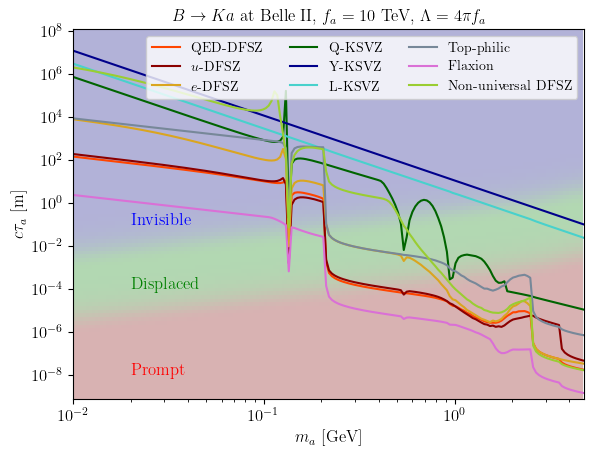

In [ ]:
plt.figure(figsize=(15.5/2.54, 12/2.54))

plt.pcolormesh(x_ma, y_ctau, probs/2, alpha=0.3, zorder=-20)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')

plt.loglog(ma, ctau_DFSZ, label='QED-DFSZ', c='orangered', lw=1.5)
plt.loglog(ma, ctau_uDFSZ, label='$u$-DFSZ', c='darkred', lw=1.5)
plt.loglog(ma, ctau_eDFSZ, label='$e$-DFSZ', c='goldenrod', lw=1.5)
plt.loglog(ma, ctau_qKSVZ, label='Q-KSVZ', c='darkgreen', lw=1.5)
plt.loglog(ma, ctau_yKSVZ, label='Y-KSVZ', c='darkblue', lw=1.5)
plt.loglog(ma, ctau_lKSVZ, label='L-KSVZ', c='mediumturquoise', lw=1.5)
plt.loglog(ma, ctau_top, label='Top-philic', c='lightslategray', lw=1.5)
plt.loglog(ma, ctau_flaxion, label='Flaxion', c='orchid', lw=1.5)
plt.loglog(ma, ctau_nonunivDFSZ, label='Non-universal DFSZ', c='yellowgreen', lw=1.5)

plt.text(2e-2, 1e-8, 'Prompt', color='r')
plt.text(2e-2, 1e-4, 'Displaced', color='g')
plt.text(2e-2, 1e-1, 'Invisible', color='b')

plt.xlim(1e-2, mB-mK)

plt.legend(fontsize=10, ncols=3, loc='upper right')
plt.xlabel(r'$m_a$ [GeV]')
plt.ylabel(r'$c\tau_a$ [m]')
plt.title(r'$B\to K a$ at Belle II, $f_a = 10$ TeV, $\Lambda=4\pi f_a$', fontsize=12)
ax.set_rasterization_zorder(-10)
plt.tight_layout()
#plt.savefig('ctau_BK.pdf', dpi=500)